Intro to Data Analysis Project (Titanic Dataset)

Introduction
Performing a data analysis on a sample Titanic dataset.
This dataset contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. A description of this dataset can be viewed here (https://www.kaggle.com/c/titanic/data).



Questions to be answered

The fundamental question that requires to be answered is provided very succicently at https://www.kaggle.com/c/titanic which is quite simply:- What factors made people more likely to survive?

There are nuances within this fundamental question which promises to give out interesting observations and conclusions. Hence, the following questions were chosen:- 
1.	Is there a relationship between socio economic status and survival?
2.	Is there a relationship between ticket price and survival?
3.	Did women and children have better survival?
4.	Did the presence of parents help survival of children compared to nannies?
5.	Did port of embarkation have any relation to survival, regardless of sex?

Assuming that everyone who survived made it to a life boat and it wasn't by luck.


Data Wrangling

The data was obtained from https://www.kaggle.com/c/titanic  and it has the following characterictics:

•	survival: Survival (0 = No; 1 = Yes)

•	pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

•	name: Name

•	sex: Sex

•	age: Age

•	sibsp: Number of Siblings/Spouses Aboard

•	parch: Number of Parents/Children Aboard

•	ticket: Ticket Number

•	fare: Passenger Fare

•	cabin: Cabin

•	embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


Special Notes:

•	Pclass is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

•	Age is in Years; Fractional if Age less than One (1) If the Age is Estimated, it is in the form xx.5

Some relations were ignored from the variables sibsp and parch. The following are the relations considered. The relations ignored are cousins, nephew/niece, aunts/uncle and in-laws. Children travelling with nanny have parch=0 and hence they were ignored. People travelling with neighbors/friends were also ignored. This was done to render the dataset compact and limited to immediate family so that a sharper analysis can be done.

Hence, following are the relationships considered finally:

•	Sibling: Brother, Sister, Stepbrother, or Stepsister of Passenger aboard Titanic only

•	Spouse: Husband or Wife of Passenger aboard Titanic only.

•	Parent: Mother or Father of Passenger aboard Titanic only.

•	Child: Son, Daughter, Stepson, or Stepdaughter of Passenger aboard Titanic only.



In [32]:
# Render plots inline
%matplotlib inline

# Import various libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
# Set style for graphs
sns.set_style("dark")


In [34]:
# Create dataframe
titanic_data = pd.read_csv('titanic-data.csv')


In [35]:
# Create Survival Label Column
titanic_data['Survival'] = titanic_data.Survived.map({0 : 'Died', 1 : 'Survived'})
titanic_data.Survival.head()

# Create Pclass Label Column
titanic_data['Class'] = titanic_data.Pclass.map({1 : 'First Class', 2 : 'Second Class', 3 : 'Third Class'})
titanic_data.Class.head()

# Create Embarked Labels Column
titanic_data['Ports'] = titanic_data.Embarked.map({'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton'})

# Create Survival_Rate Label Column as Survived Copy
titanic_data['Survival_Rate'] = titanic_data.Survived

In [36]:
# Print the first few records to review data and format
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival,Class,Ports,Survival_Rate
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Died,Third Class,Southampton,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,First Class,Cherbourg,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,Third Class,Southampton,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,First Class,Southampton,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Died,Third Class,Southampton,0


In [37]:
# Print the last few records to review data and format
titanic_data.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival,Class,Ports,Survival_Rate
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,Died,Second Class,Southampton,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Survived,First Class,Southampton,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,Died,Third Class,Southampton,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Survived,First Class,Cherbourg,1
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,Died,Third Class,Queenstown,0


Data Cleanup
From the data description and questions to answer, it can be safely surmised that some dataset columns will not play a part in the analysis and these columns can therefore be removed. This will de-cluster the dataset and help with improve processing performance of the dataset.
•	PassengerId
•	Name
•	Ticket
 The approach to data cleanup has been taken as follows:
1.	Identifying and removing any duplicate entries
2.	Removing unnecessary columns
3.	Fixing missing and data format issues

Step 1 - Remove duplicate entries
No duplicate entries exist, based on the following tests below.


In [38]:
# Identify and remove duplicate entries
titanic_data_duplicates = titanic_data.duplicated()
print ('Number of duplicate entries is/are {}'.format(titanic_data_duplicates.sum()))

Number of duplicate entries is/are 0


In [39]:
# Duplicate test
duplicate_test = titanic_data.duplicated('Age').head()
print ('Number of entries with duplicate age in top entires are {}'.format(duplicate_test.sum()))
titanic_data.head()


Number of entries with duplicate age in top entires are 1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival,Class,Ports,Survival_Rate
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Died,Third Class,Southampton,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,First Class,Cherbourg,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,Third Class,Southampton,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,First Class,Southampton,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Died,Third Class,Southampton,0


Step 2 - Remove unnecessary columns
Columns (PassengerId, Name, Ticket) removed

In [40]:
# Create new dataset without PassengerID, Name, Ticket, Cabin
titanic_data_cleaned = titanic_data.drop(['PassengerId','Name','Ticket', 'Cabin'], axis=1)
titanic_data_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survival,Class,Ports,Survival_Rate
0,0,3,male,22.0,1,0,7.2500,S,Died,Third Class,Southampton,0
1,1,1,female,38.0,1,0,71.2833,C,Survived,First Class,Cherbourg,1
2,1,3,female,26.0,0,0,7.9250,S,Survived,Third Class,Southampton,1
3,1,1,female,35.0,1,0,53.1000,S,Survived,First Class,Southampton,1
4,0,3,male,35.0,0,0,8.0500,S,Died,Third Class,Southampton,0


Step 3 - Fix any missing or data format issues

In [41]:
# Find number of missing values
titanic_data_cleaned.isnull().sum()

Survived           0
Pclass             0
Sex                0
Age              177
SibSp              0
Parch              0
Fare               0
Embarked           2
Survival           0
Class              0
Ports              2
Survival_Rate      0
dtype: int64

In [42]:
# Review some of the missing Age data
missing_age_bool = pd.isnull(titanic_data_cleaned['Age'])
titanic_data_cleaned[missing_age_bool].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survival,Class,Ports,Survival_Rate
5,0,3,male,NaN,0,0,8.4583,Q,Died,Third Class,Queenstown,0
17,1,2,male,NaN,0,0,13.0000,S,Survived,Second Class,Southampton,1
19,1,3,female,NaN,0,0,7.2250,C,Survived,Third Class,Cherbourg,1
26,0,3,male,NaN,0,0,7.2250,C,Died,Third Class,Cherbourg,0
28,1,3,female,NaN,0,0,7.8792,Q,Survived,Third Class,Queenstown,1


In [43]:
# Determine number of males and females with missing age values
missing_age_female = titanic_data_cleaned[missing_age_bool]['Sex'] == 'female'
missing_age_male = titanic_data_cleaned[missing_age_bool]['Sex'] == 'male'

In [44]:
print ('Number for females and males with age missing are {} and {} respectively'.
       format(missing_age_female.sum(),missing_age_male.sum()))


Number for females and males with age missing are 53 and 124 respectively


In [45]:
# Taking a look at the datatypes
titanic_data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Sex              891 non-null object
Age              714 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         889 non-null object
Survival         891 non-null object
Class            891 non-null object
Ports            889 non-null object
Survival_Rate    891 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Missing Age data is 177 out of 891 i.e about 20% of our dataset. Graphing and summations shouldn't be a problem since they will be treated as zero(0) value. However,it needs to be accounted for if reviewing descriptive stats such as mean age.

Age missing proportions across male and female are

•	Age missing in male data: 124

•	Age missing in female data: 53


Data Exploration and Visualization

In [46]:
# Descriptive statistics for cleaned dataset
titanic_data_cleaned.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare,Survival_Rate
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


Question 1

Were social-economic standing a factor in survival rate?


In [47]:
# Survival rate/percentage of sex and class
def survival_rate(Class, sex):
    """
    Args:
        Class: class value First Class,Second Class or Third Class
        sex: male or female
    Returns:
        survival rate as percentage.
    """
    grouped_by_total = titanic_data_cleaned.groupby(['Class', 'Sex']).size()[Class,sex].astype('float')
    grouped_by_survived_sex = \
        titanic_data_cleaned.groupby(['Class','Survived','Sex']).size()[Class,1,sex].astype('float')
    survived_sex_pct = (grouped_by_survived_sex / grouped_by_total * 100).round(2)
    
    return survived_sex_pct



In [48]:
# Actual numbers grouped by class, survival and sex
groupedby_class_survived_size = titanic_data_cleaned.groupby(['Class','Survived','Sex']).size()


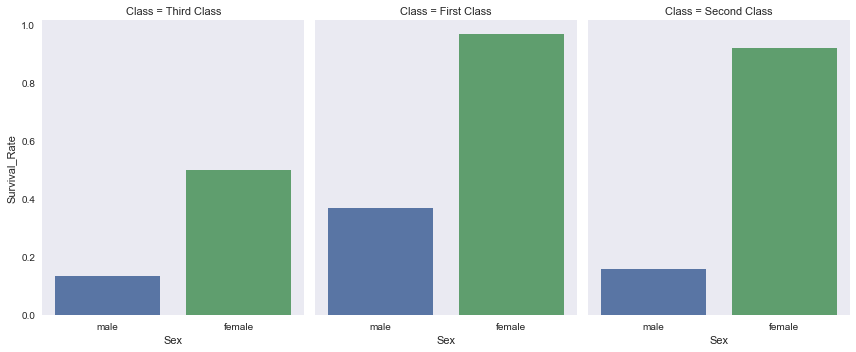

In [49]:
# Graph - Grouped by class, survival and sex
g = sns.factorplot(x="Sex", y="Survival_Rate", col="Class", 
                   data=titanic_data_cleaned,
                    kind="bar", ci=None, size=5, aspect=.8)

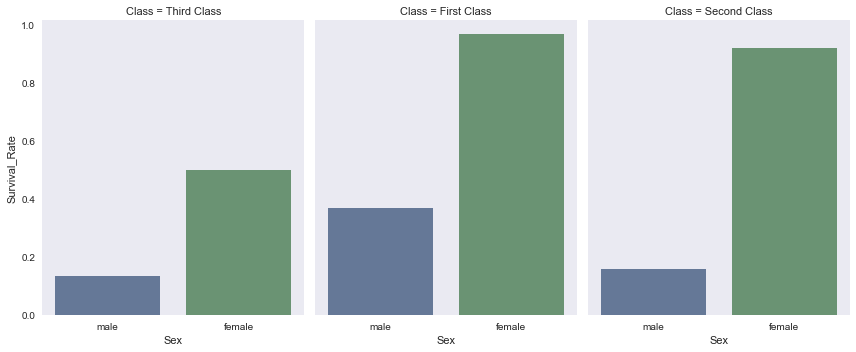

In [50]:
# Graph - Grouped by class, survival and sex
g = sns.factorplot(x="Sex", y="Survival_Rate", col="Class", data=titanic_data_cleaned,
                   saturation=.5, kind="bar", ci=None, size=5, aspect=.8)

In [51]:
# Grouped by class, survival and sex
print (groupedby_class_survived_size)
print ('First Class - female survival rate: {}%'.format(survival_rate('First Class','female')))
print ('First Class - female survival rate: {}%'.format(survival_rate('First Class','male')))
print ('-----')
print ('Second Class - female survival rate: {}%'.format(survival_rate('Second Class','female')))
print ('Second Class - female survival rate: {}%'.format(survival_rate('Second Class','male')))
print ('-----')
print ('Third Class - female survival rate: {}%'.format(survival_rate('Third Class','female')))
print ('Third Class - female survival rate: {}%'.format(survival_rate('Third Class','male')))

Class         Survived  Sex   
First Class   0         female      3
                        male       77
              1         female     91
                        male       45
Second Class  0         female      6
                        male       91
              1         female     70
                        male       17
Third Class   0         female     72
                        male      300
              1         female     72
                        male       47
dtype: int64
First Class - female survival rate: 96.81%
First Class - female survival rate: 36.89%
-----
Second Class - female survival rate: 92.11%
Second Class - female survival rate: 15.74%
-----
Third Class - female survival rate: 50.0%
Third Class - female survival rate: 13.54%


Looking at the percentages of the overall passengers per class and the total numbers across each class, it can be assumed that a passenger from Class 1 is about 2.5x times more likely to survive than a passenger in Class 3.


Social-economic standing was a factor in survival rate of passengers.

•	First Class : 62.96%

•	Second Class: 47.28%

•	Third Class : 24.24%



Question 2

Is there a relationship between ticket price and survival?

So, to determine this relation and properly classify this, we first quantify the fare data into 3 bands- high, medium and low, which reflects the relative wealth of the passengers. This is done by first determining the quartiles. This will divide the the fares into 3 wealth levels as

1.	1st Quartile (<25) = Low
2.	2nd, 3rd Quartile (25 to 75)= Medium
3.	4th Quartile (>75) = High


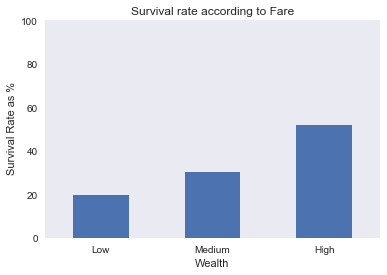

In [54]:
fare_quantiles= pd.qcut(titanic_data_cleaned['Fare'], 
                        q= [0, 0.25, 0.5, 1], 
                        labels= ['Low', 'Medium', 'High'])

gb= titanic_data_cleaned.groupby(fare_quantiles)['Survived'].mean()*100
ax=gb.plot.bar()

ax.set(title='Survival rate according to Fare', 
       xlabel= 'Wealth', ylabel=' Survival Rate as %',
       ylim=[0,100])

# Fix rotation on y-ticks
ax.set_xticklabels(ax.get_xmajorticklabels(), rotation=0)


   


From the percentages, it is obvious that passengers with higher Wealth i.e. passengers booking higher ticket value was a factor in survival.


Question 3

Did women and children have better survival rate?

Since children are not defined in this dataset, hence passengers with age<18 is taken to be children.



In [29]:
# Create Cateogry column and categorize people

titanic_data_cleaned.loc[
    ( (titanic_data_cleaned['Sex'] == 'female') & 
    (titanic_data_cleaned['Age'] >= 18) ),'Category'] = 'Woman'


In [30]:
titanic_data_cleaned.loc[
    ( (titanic_data_cleaned['Sex'] == 'male') & 
    (titanic_data_cleaned['Age'] >= 18) ),
    'Category'] = 'Man'


In [31]:
titanic_data_cleaned.loc[
    (titanic_data_cleaned['Age'] < 18),
    'Category'] = 'Child'


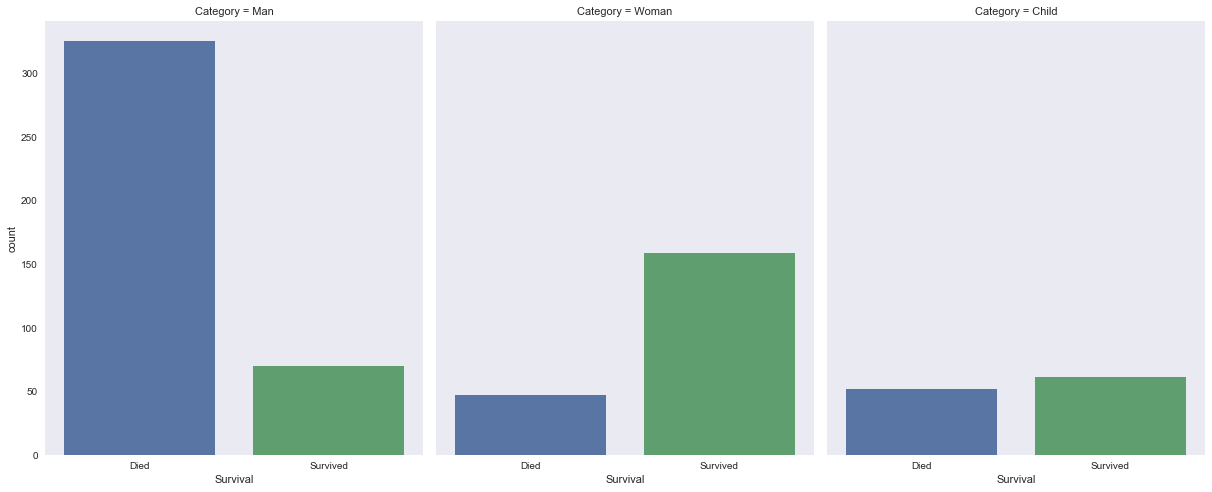

In [32]:
# Graph - Compare survival count between Men, Women and Children
g = sns.factorplot(x='Survival', col='Category', data=titanic_data_cleaned, kind='count', size=7, aspect=.8)


In [44]:
# Get the totals grouped by Men, Women and Children, and by survival
print (titanic_data_cleaned.groupby(['Category','Survived']).size())


Category  Survived
Child     0            52
          1            61
Man       0           325
          1            70
Woman     0            47
          1           159
dtype: int64


The data and the graphs suggests that being "women and children" possibly played a role in the survival of a number of people.
It seems from the data that more women survived than children percent wise which is a bit surprising. It is possible that near adults ie close to 18 children particularly boys were treated as adults and hence were left to fend for themselves as adults, hence accounting for the larger mortality.


Question 4

Did the presence of parents help survival of children compared to nannies?

Some of the children were accompanied by their nannies. Now an interesting question is whether they abandoned their wards to save themselves or took similar care as any parent would and try to save the children. So, first we have to separate the children into two groups, one with nanies and other with parents and compare their survival rates.


Assumptions:

Classifying people as 'Child' represented by those under 18 years old is applying today's standards to the 1900 century


In [45]:
# Parse out children with parents from those with nannies 
titanic_data_children_nannies = titanic_data_cleaned.loc[
    (titanic_data_cleaned['Category'] == 'Child') &
    (titanic_data_cleaned['Parch'] == 0)]

In [46]:
titanic_data_children_parents = titanic_data_cleaned.loc[
    (titanic_data_cleaned['Category'] == 'Child') &
    (titanic_data_cleaned['Parch'] > 0)]


In [47]:
# Determine children with nannies who survived and who did not
survived_children_nannies = titanic_data_children_nannies.Survived.sum()
total_children_nannies = titanic_data_children_nannies.Survived.count()
pct_survived_nannies = ((float(survived_children_nannies)/total_children_nannies)*100)
pct_survived_nannies = np.round(pct_survived_nannies,2)
survived_children_nannies_avg_age = np.round(titanic_data_children_nannies.Age.mean())

In [48]:
# Results
print ('Total number of children with nannies: {}\n\
Children with nannies who survived: {}\n\
Children with nannies who did not survive: {}\n\
Percentage of children who survived: {}%\n\
Average age of surviving children: {}'\
.format(total_children_nannies, survived_children_nannies, 
        total_children_nannies-survived_children_nannies, pct_survived_nannies, survived_children_nannies_avg_age))

Total number of children with nannies: 32
Children with nannies who survived: 16
Children with nannies who did not survive: 16
Percentage of children who survived: 50.0%
Average age of surviving children: 15.0


In [49]:
# Determine children with parents who survived and who did not
survived_children_parents = titanic_data_children_parents.Survived.sum()
total_children_parents = titanic_data_children_parents.Survived.count()
pct_survived_parents = ((float(survived_children_parents)/total_children_parents)*100)
pct_survived_parents = np.round(pct_survived_parents,2)
survived_children_parents_avg_age = np.round(titanic_data_children_parents.Age.mean())

In [50]:
# Results
print ('Total number of children with parents: {}\n\
Children with parents who survived: {}\n\
Children with parents who did not survive: {}\n\
Percentage of children who survived: {}%\n\
Average age of surviving children: {}'\
.format(total_children_parents, survived_children_parents, 
        total_children_parents-survived_children_parents, pct_survived_parents,survived_children_parents_avg_age))

Total number of children with parents: 81
Children with parents who survived: 45
Children with parents who did not survive: 36
Percentage of children who survived: 55.56%
Average age of surviving children: 7.0


Based on the data analysis above, it would appear that the survival rate for children who were accompanied by parents vs those children accompanied by nannies was slighly higher for those with parents. 

The slight increase could be due to the average age of children with parents being younger, almost half, that of children with nannies.

•	Percentage of children with nannies who survived: 50.0%

•	Percentage of children with parents who survived: 55.56%

•	Average age of surviving children with nannies: 15

•	Average age of surviving children with parents: 7.0


Question 5

Did port of embarkation have any relation to survival, regardless of sex?

We first determine the number of people embarking from each port and plot it is follows

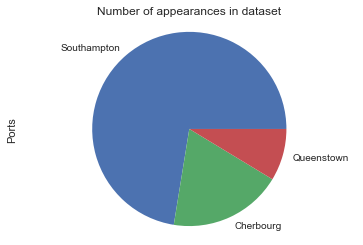

In [56]:
titanic_data_cleaned.Ports.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Number of appearances in dataset')

Thus Southamption has the maximum number of people embarking. However, what we really need to find is the percentage of survivors from each port which will give us a better picture.

In [51]:
# Define Survival and Embarked
Embarked= titanic_data_cleaned['Embarked']
Survived= titanic_data_cleaned['Survived']

In [201]:
# Survival rate/percentage of Embarked ports
def survival_rate(Embarked):
    """
    Args:
        Embarked: class value S,C or Q
    Returns:
        survival rate as percentage.
    """
    grouped_by_total = titanic_data_cleaned.groupby(['Embarked']).size()[Embarked].astype('float')
    grouped_by_survived_Embarked = \
        titanic_data_cleaned.groupby(['Embarked','Survived']).size()[Embarked,1].astype('float')
    survived_Embarked_pct = (grouped_by_survived_Embarked / grouped_by_total * 100).round(2)
    
    return survived_Embarked_pct
   

In [203]:
# Actual numbers grouped by suvival and Embarked
groupedby_Embarked_survived = titanic_data_cleaned.groupby(['Embarked','Survived']).size()

In [204]:
# Grouped by Survival and Embarked

print (groupedby_Embarked_survived)
print ('Southampton - survival rate: {}%'.format(survival_rate('S')))
print ('-----')
print ('Cherbourg - survival rate: {}%'.format(survival_rate('C')))
print ('-----')
print ('Queenstown - survival rate: {}%'.format(survival_rate('Q')))


Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64
Southampton - survival rate: 33.7%
-----
Cherbourg - survival rate: 55.36%
-----
Queenstown - survival rate: 38.96%


Hence, Survival rate of passengers from Cherbourg was the highest and hence port of embarkation was a factor in survival.

Conclusion

The results of the analysis, although tentative, indicates that wealth, class and sex, namely, being a wealthy female with upper social-economic standing (first class), would give one the best chance of survival when the tragedy occurred on the Titanic. While being a man in third class, gave one the lowest chance of survival. Women and children, across all classes, tend to have a higher survival rate than men in genernal but by no means did being a child or woman guarentee survival. 
Although, overall, children accompanied by parents (or nannies) had the best survival rate at over 50%.

Issues:
•	A portion of men and women did not have Age data and were removed from calculations which could have skewed some numbers

•	The category of 'children' was assumed to be anyone under the age of 18, using today's North American standard for adulthood which was certainly not the case in the 1900s

References
•	https://www.kaggle.com/c/titanic/data

•	http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/tree/master/cookbook/

•	https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.factorplot.html#seaborn.factorplot

•	http://www.ncbi.nlm.nih.gov/pmc/articles/PMC3865739/
